In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature analysis notebook

In this notebook, features created in 3_DF_reator are analyzed.

- Histograms for "rolling_avg_dso", "overdue_ratio", "near_payment_term_ratio"
- Histograms for counts + binned + binarized
- Plot near_payment_term_ratio for thesis
- Plot ratio_outstanding fot thesis
- Plots for weekday feature
- Distribution of reminder features
- Distribution of clarification features
- Distribution of reminders/clarification features in train/test/val

In [ ]:
df = pd.read_csv("data/dataset_3.csv")
df.columns

# Histograms of customer varibles

Plot histograms of engineered variables for first visual analysis (Counts in next cell)

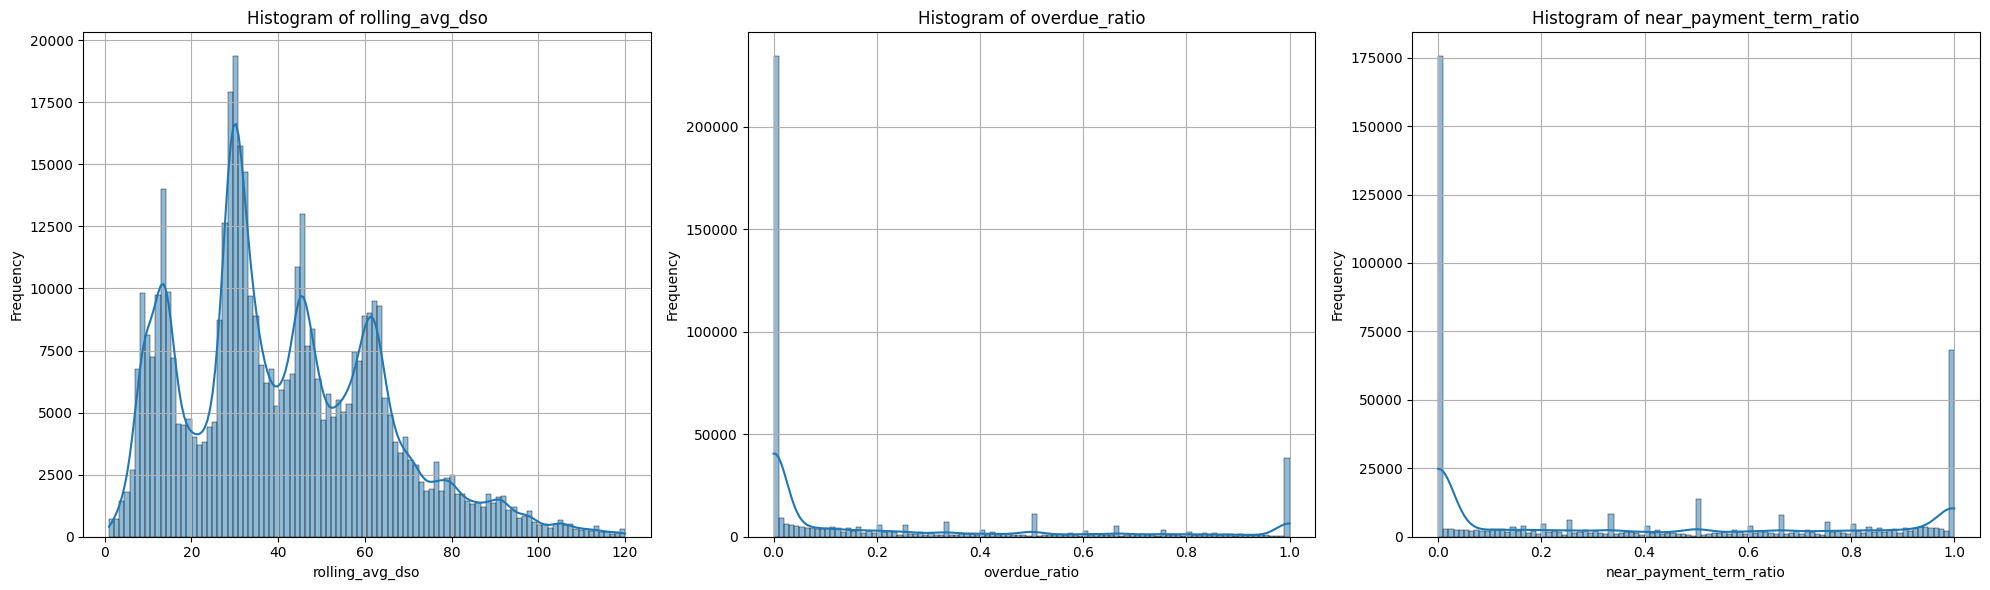

In [9]:
columns = ["rolling_avg_dso", "overdue_ratio", "near_payment_term_ratio"]

# Define the number of rows and columns
nrows = 1
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns and plot histograms
for j in range(len(columns)):
    column = columns[j]
    sns.histplot(df[column], bins=100, kde=True, ax=axes[j])
    axes[j].set_title(f'Histogram of {column}')
    axes[j].set_xlabel(column)
    axes[j].set_ylabel('Frequency')
    axes[j].grid(True)

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Display the plot
plt.tight_layout()
plt.show()

Histograms of count variables not transformed, binned and binarized.

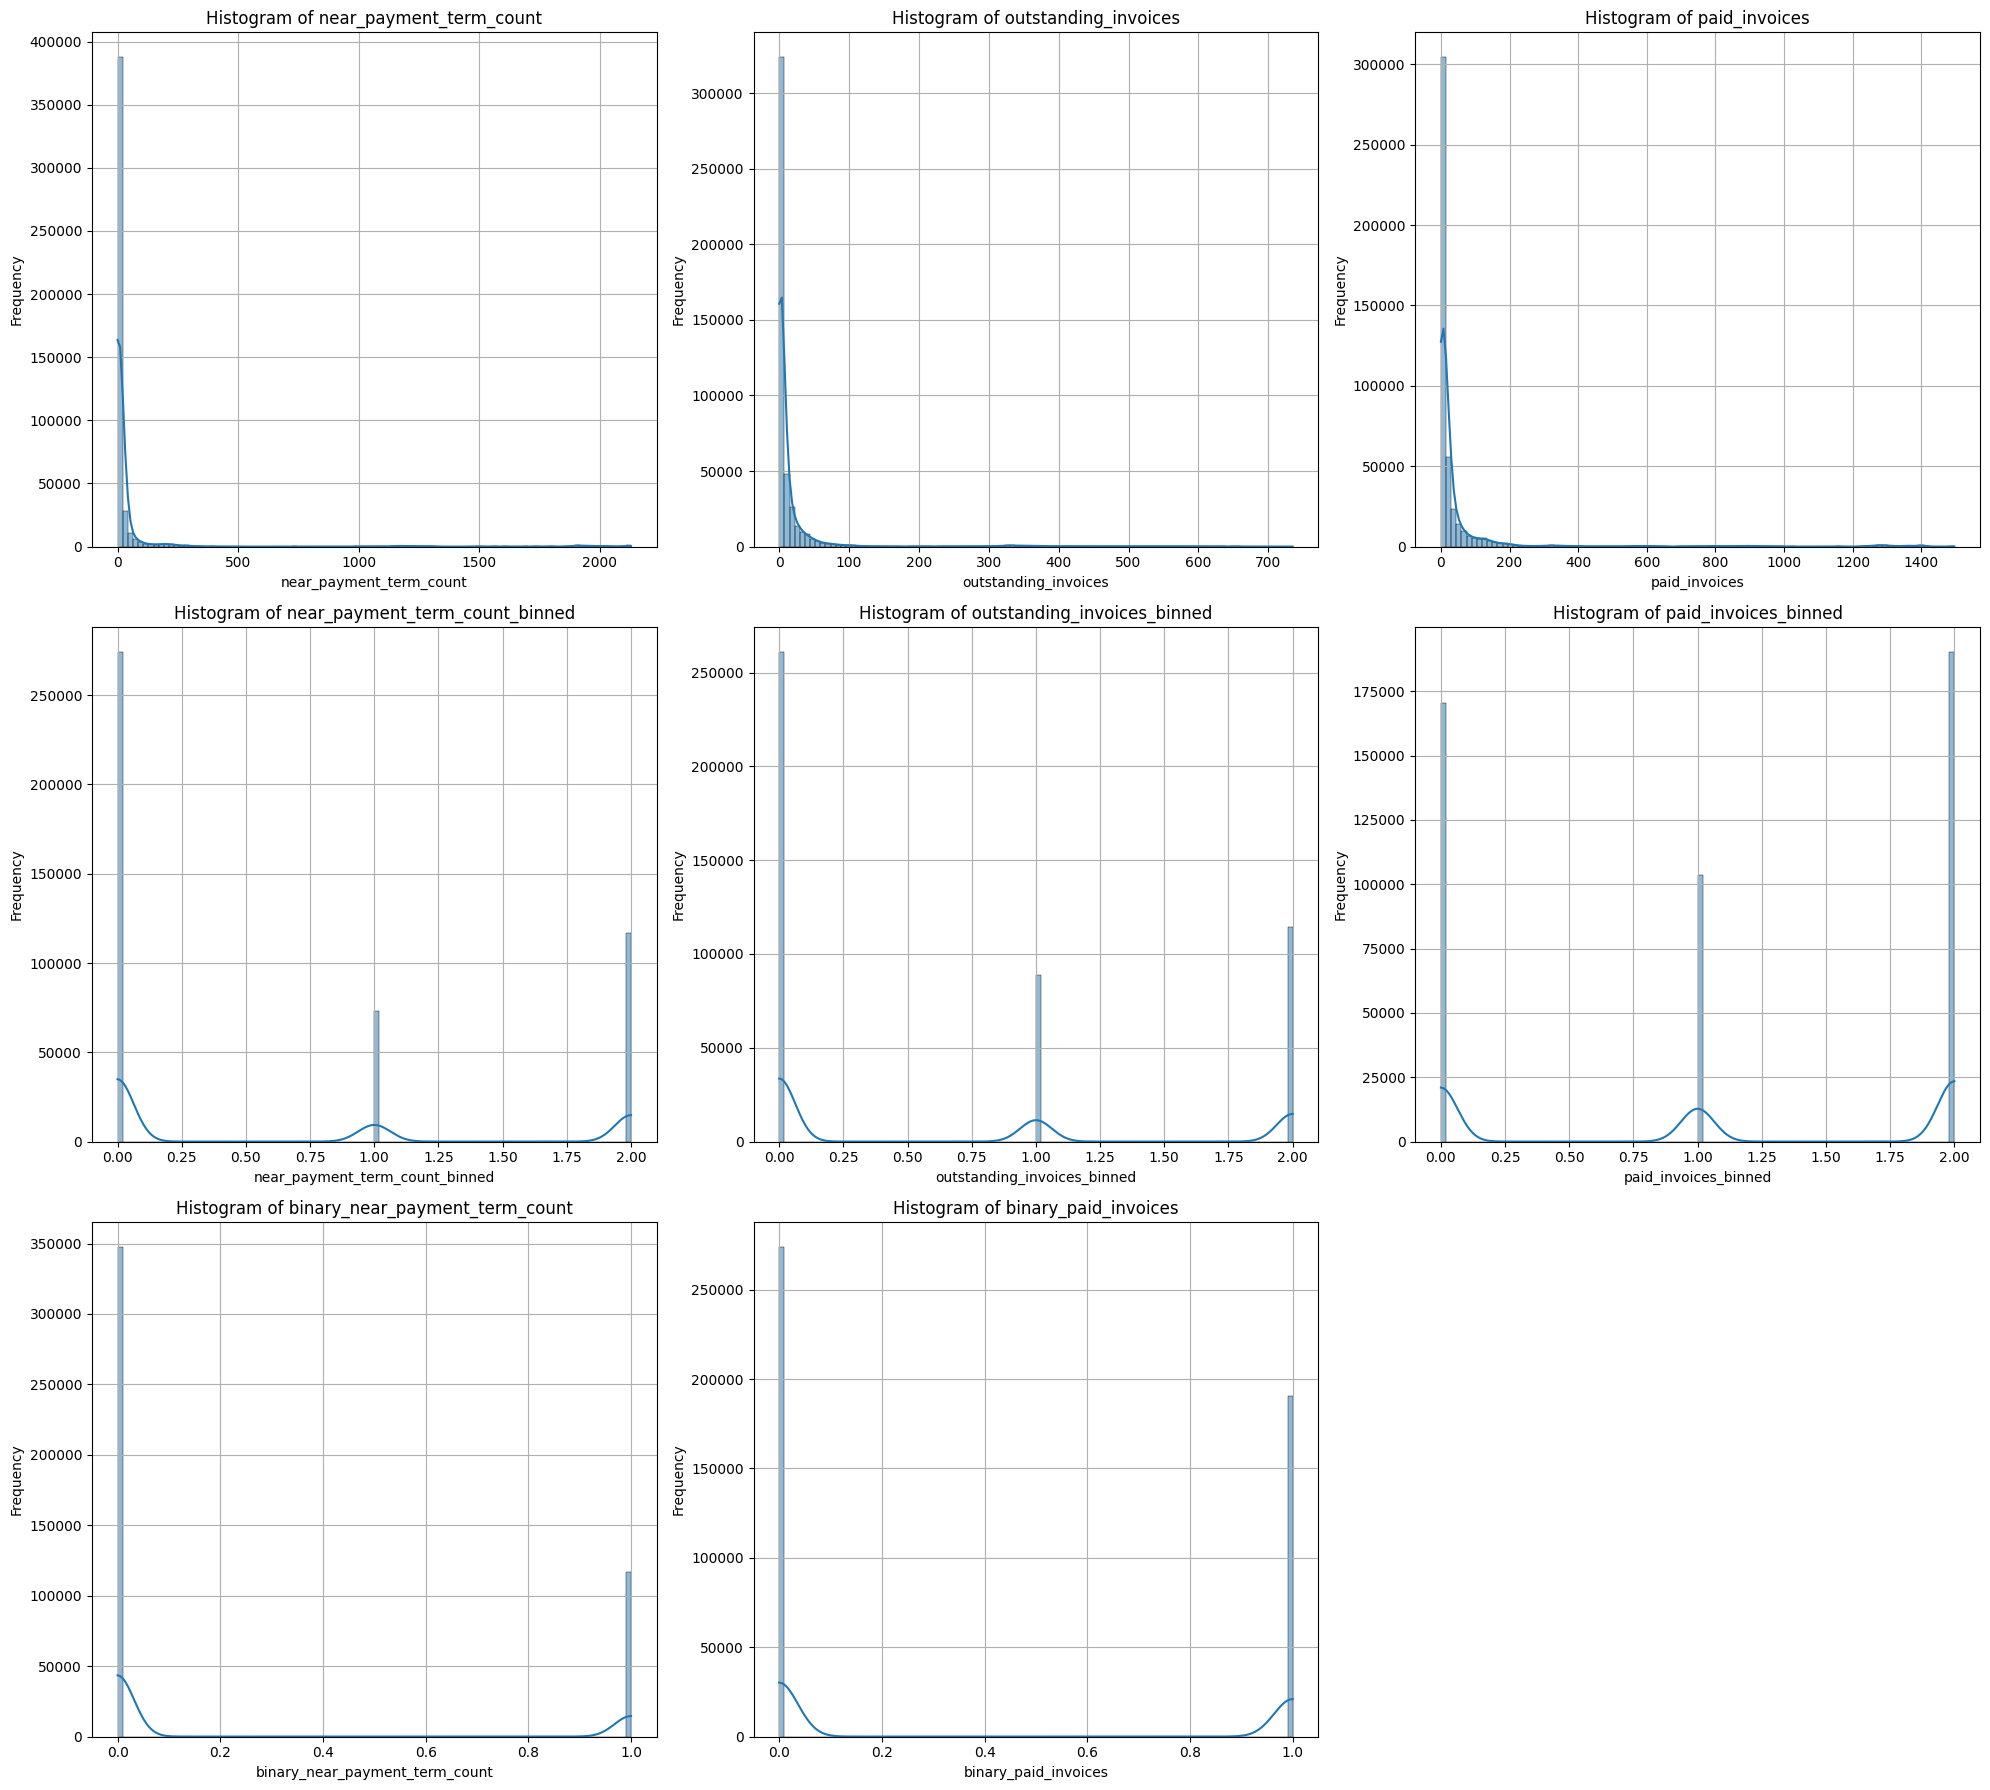

In [10]:
columns = ['near_payment_term_count', 'outstanding_invoices', 'paid_invoices', 'near_payment_term_count_binned',
       'outstanding_invoices_binned', 'paid_invoices_binned', 'binary_near_payment_term_count', 'binary_paid_invoices']

# Define the number of rows and columns
nrows = 3
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns and plot histograms
for j in range(len(columns)):
    column = columns[j]
    sns.histplot(df[column], bins=100, kde=True, ax=axes[j])
    axes[j].set_title(f'Histogram of {column}')
    axes[j].set_xlabel(column)
    axes[j].set_ylabel('Frequency')
    axes[j].grid(True)

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Display the plot
plt.tight_layout()
plt.show()

## Binary_near_payment_term_ratio

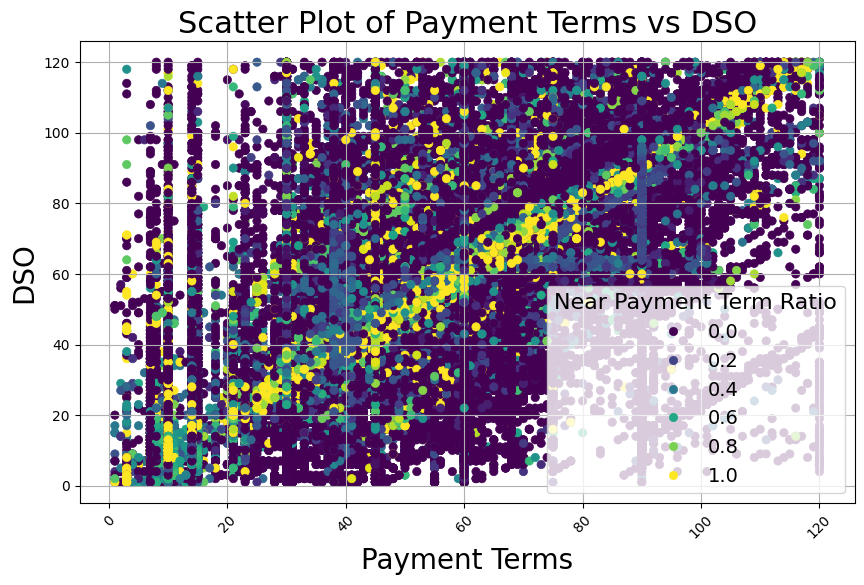

In [11]:
# Create a scatter plot with payment_terms on the X-axis and dso on the Y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_terms', y='dso', hue='near_payment_term_ratio', data=df, palette='viridis', edgecolor=None)

# Set labels and title
plt.xlabel('Payment Terms', fontsize = 20)
plt.xticks(rotation=45)
plt.ylabel('DSO', fontsize = 20)
plt.title('Scatter Plot of Payment Terms vs DSO', fontsize = 22)
plt.grid(True)

plt.legend(title='Near Payment Term Ratio', title_fontsize=16, fontsize=14, loc='best')

# Display the plot
plt.show()

## Binary Ratio Outstanding

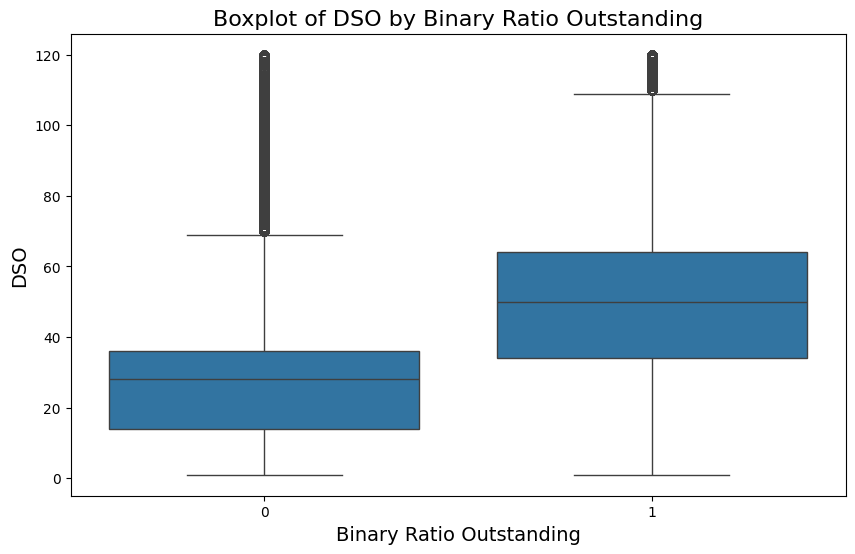

In [12]:
# For boxplot representation
df["binary_ratio_outstanding"] = df['ratio_outstanding'].apply(lambda x: 1 if x > 0.25 else 0)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='binary_ratio_outstanding', y='dso', data=df)

# Add title and labels
plt.title('Boxplot of DSO by Binary Ratio Outstanding', fontsize=16)
plt.xlabel('Binary Ratio Outstanding', fontsize = 14)
plt.ylabel('DSO', fontsize = 14)


# Display the plot
plt.show()

## Weekday feature: 

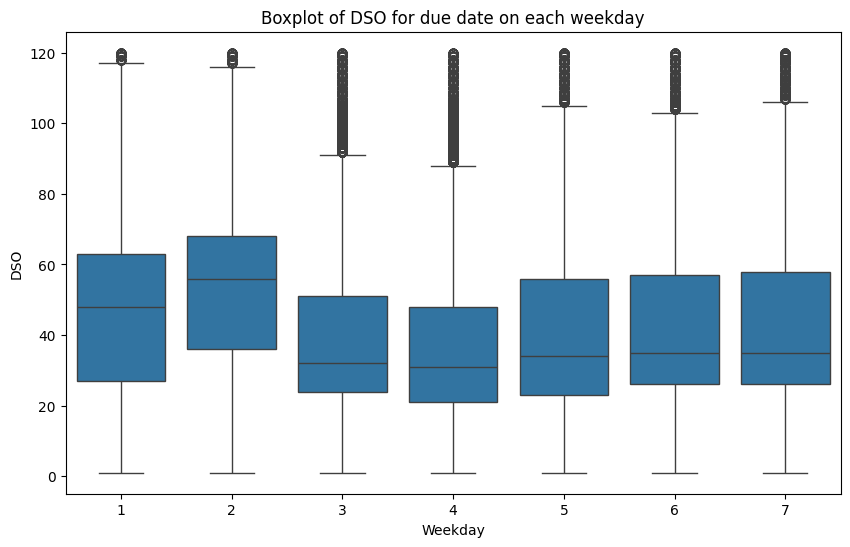

In [15]:
# New column weekday based on due_date of invoices
df['due_date'] = pd.to_datetime(df['due_date'])
df['weekday'] = df['due_date'].dt.weekday + 1

#weedend if weekday 6 or 7
df['weekend'] = df['weekday'].apply(lambda x: 1 if x in [6, 7] else 0)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='dso', data=df)

# Add title and labels
plt.title('Boxplot of DSO for due date on each weekday')
plt.xlabel('Weekday')
plt.ylabel('DSO')

# Display the plot
plt.show()

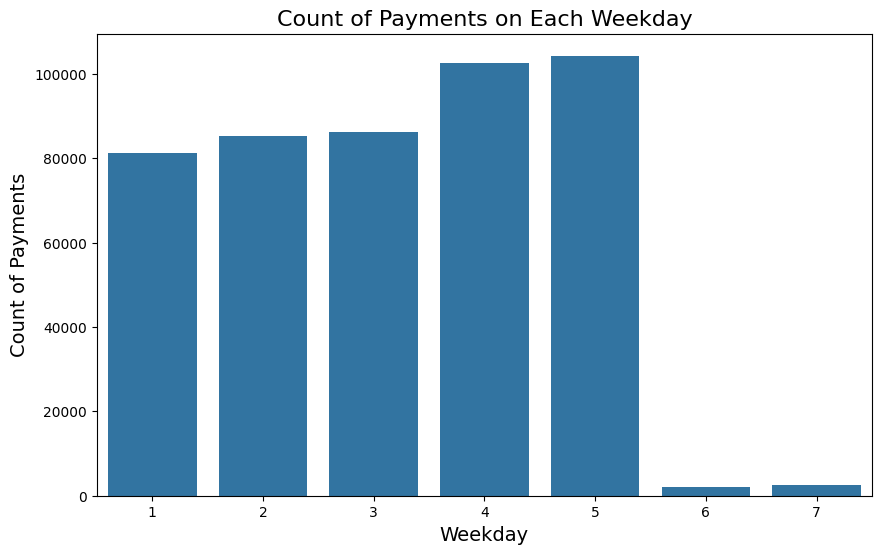

In [16]:
# New column weekday based on due_date of invoices
df['weighted_payment_date'] = pd.to_datetime(df['weighted_payment_date'])
df['payment_day_weekday'] = df['weighted_payment_date'].dt.weekday + 1

# Count the number of payments for each weekday
weekday_counts = df['payment_day_weekday'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)

# Add title and labels
plt.title('Count of Payments on Each Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count of Payments', fontsize=14)

# Display the plot
plt.show()

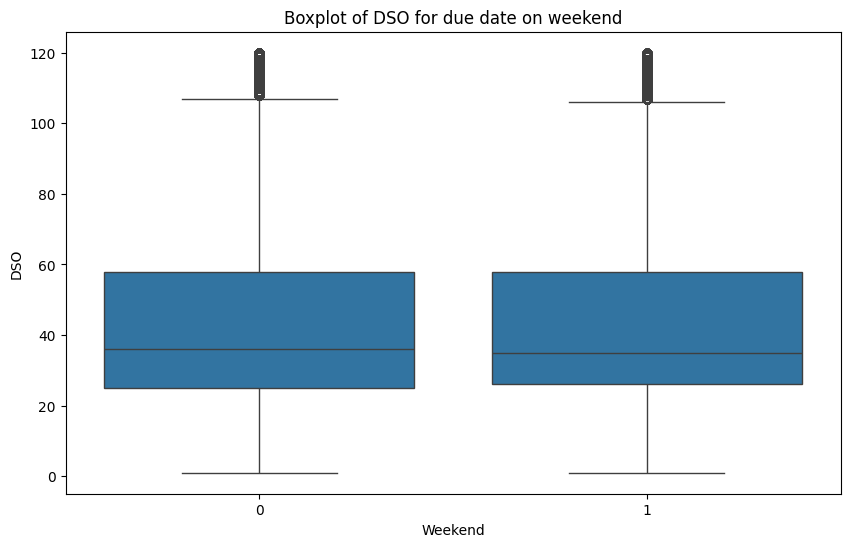

In [17]:
#weedend if weekday 6 or 7
df['weekend'] = df['weekday'].apply(lambda x: 1 if x in [6, 7] else 0)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekend', y='dso', data=df)

# Add title and labels
plt.title('Boxplot of DSO for due date on weekend')
plt.xlabel('Weekend')
plt.ylabel('DSO')

# Display the plot
plt.show()

# Reminder feature analysis

In [ ]:
df_reminders = pd.read_csv("data/dataset_4.csv")
df_reminders['weighted_payment_date']=pd.to_datetime(df_reminders['weighted_payment_date'],format='%Y-%m-%d')
df_reminders['due_date']=pd.to_datetime(df_reminders['due_date'],format='%Y-%m-%d')

df_reminders.head()

<Axes: xlabel='count_past_reminders', ylabel='Count'>

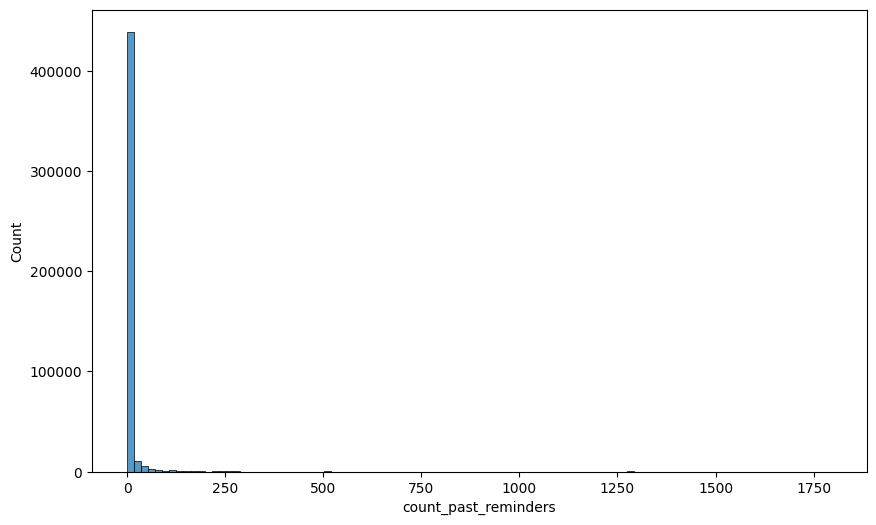

In [19]:
# Histogram auf count_past_reminders
plt.figure(figsize=(10, 6))
sns.histplot(df_reminders['count_past_reminders'], bins=100, kde=False)

<Axes: xlabel='binary_reminder_count', ylabel='Count'>

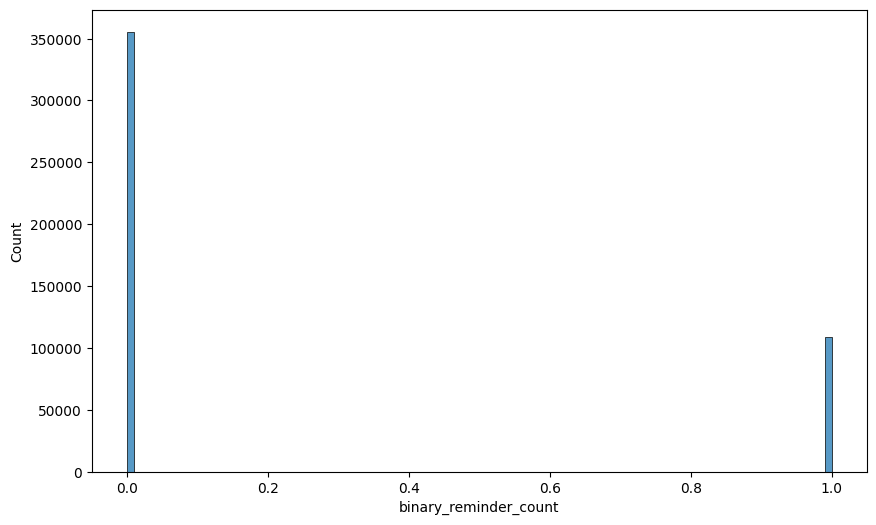

In [20]:
df_reminders["binary_reminder_count"] = df_reminders.apply(lambda row: 0 if row['count_past_reminders'] == 0 else 1 , axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df_reminders['binary_reminder_count'], bins=100, kde=False)

<Axes: xlabel='average_reminder_stage', ylabel='Count'>

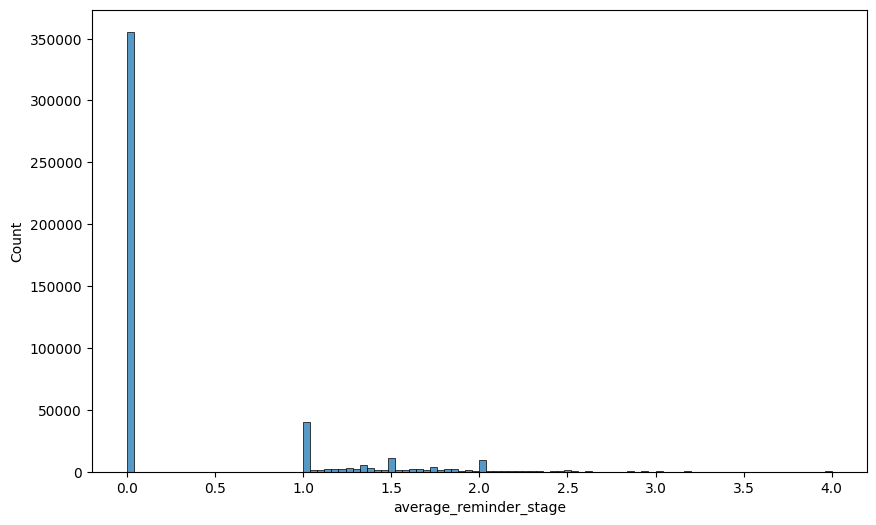

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_reminders['average_reminder_stage'], bins=100, kde=False)

/var/folders/9d/lp3872xs2yg9v6x6cvlmkf2w0000gp/T/ipykernel_4884/1950388701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reminders_subset["binary_avg_reminder_stage"] = df_reminders_subset.apply(lambda row: 0 if row['average_reminder_stage']  < 1 else 1 , axis=1)


<Axes: xlabel='binary_avg_reminder_stage', ylabel='Count'>

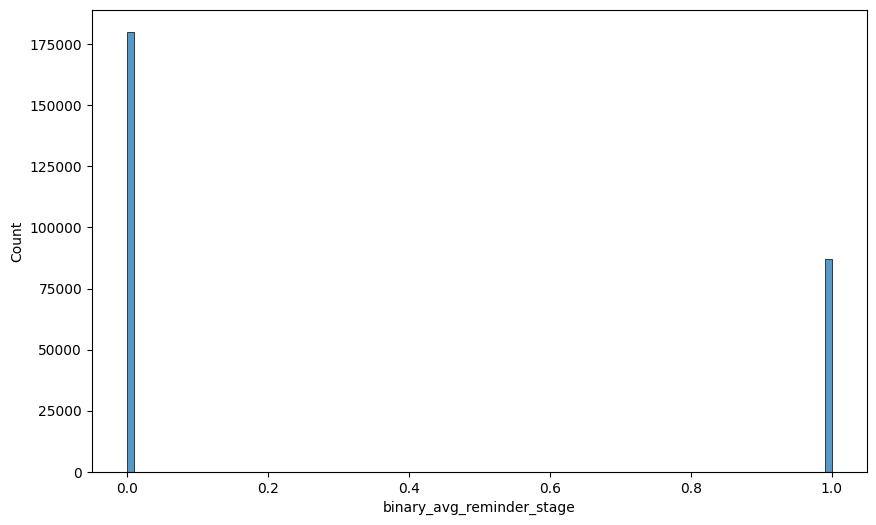

In [22]:
#Subset of df_reminders with receipt_datr > 01.02.2023
df_reminders_subset = df_reminders[df_reminders['receipt_date'] > '2023-02-01']

df_reminders_subset["binary_avg_reminder_stage"] = df_reminders_subset.apply(lambda row: 0 if row['average_reminder_stage']  < 1 else 1 , axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df_reminders_subset['binary_avg_reminder_stage'], bins=100, kde=False)

# Clarification Feature Analysis

In [23]:
df_clarifications = pd.read_csv("data/dataset_5.csv")

<Axes: xlabel='count_past_clarifications', ylabel='Count'>

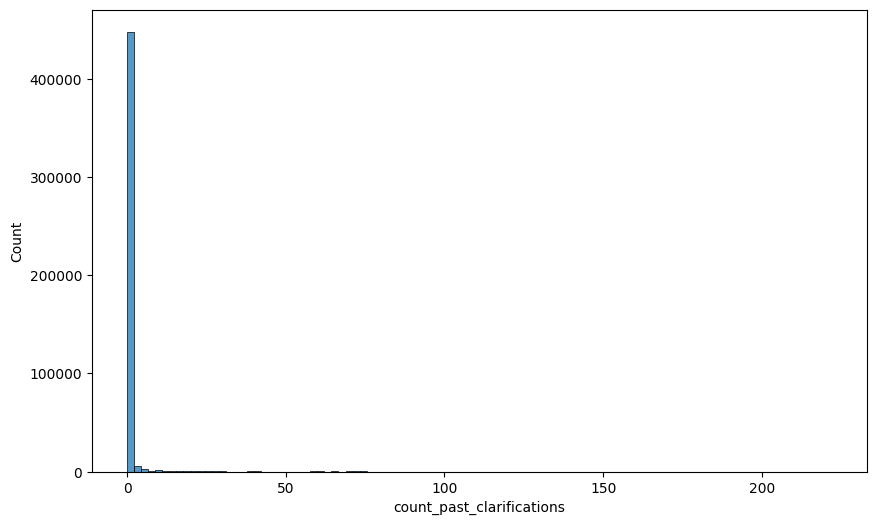

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clarifications['count_past_clarifications'], bins=100, kde=False)

<Axes: xlabel='binary_count_past_clarifications', ylabel='Count'>

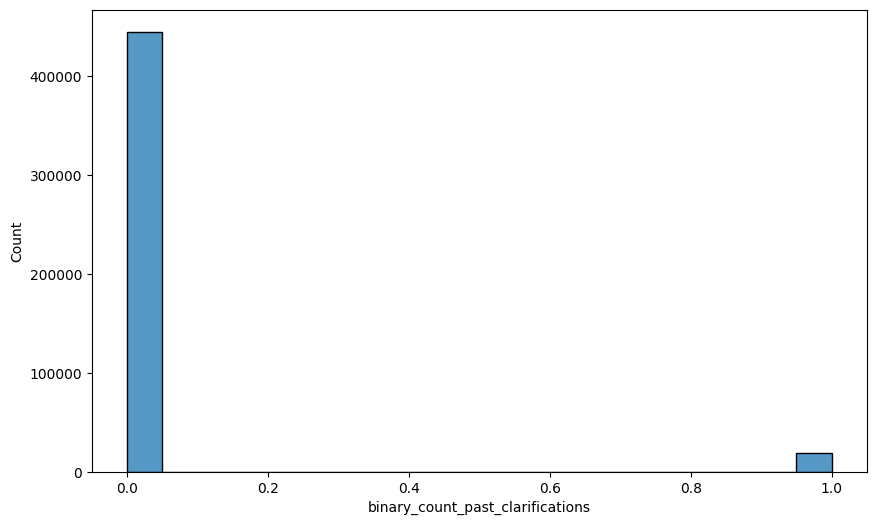

In [25]:
df_clarifications["binary_count_past_clarifications"] = df_clarifications.apply(lambda row: 0 if row['count_past_clarifications']  == 0.0 else 1 , axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df_clarifications['binary_count_past_clarifications'], bins=20, kde=False)

<Axes: xlabel='log_avg_clarification_days', ylabel='Count'>

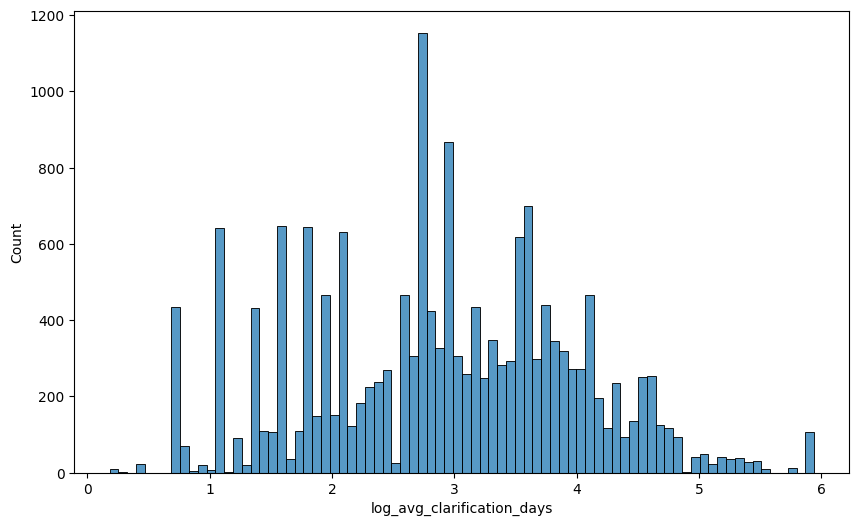

In [26]:
#subset where avg_clarification days == 0 removed
df_clarifications_subset = df_clarifications[df_clarifications['avg_clarification_days'] != 0]

#log transformation
df_clarifications_subset.loc[:, 'log_avg_clarification_days'] = np.log(df_clarifications_subset['avg_clarification_days'] + 1)

plt.figure(figsize=(10, 6))
sns.histplot(df_clarifications_subset['log_avg_clarification_days'], bins=80, kde=False)

# Distribution of Dunning features in Train, Val & Test

*Reminder Features*:
- "binary_reminder_count" 
- "average_reminder_stage"

*Clarification features:
- "binary_count_past_clarifications"
- "log_avg_clarification_days"
- "binary_dunning_stop"

In [ ]:
train_data = pd.read_csv("data/Dataset_5/X_train.csv")
val_data = pd.read_csv("data/Dataset_5/X_val.csv")
test_data = pd.read_csv("data/Dataset_5/X_test.csv")

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)
train_data.columns

In [28]:
# Binary reminder Count analysis

#number of columns with binary reminder count = 1 in train data
print("Train data:")
print(train_data['binary_reminder_count'].value_counts(normalize=True))
print("-----------------")
print("Val Data")
print(val_data['binary_reminder_count'].value_counts(normalize=True))
print("-----------------")
print("Test Data")
print(test_data['binary_reminder_count'].value_counts(normalize=True))

Train data:
binary_reminder_count
0.0    0.804978
1.0    0.195022
Name: proportion, dtype: float64
-----------------
Val Data
binary_reminder_count
0.0    0.600146
1.0    0.399854
Name: proportion, dtype: float64
-----------------
Test Data
binary_reminder_count
0.0    0.526188
1.0    0.473812
Name: proportion, dtype: float64


In [29]:
# proportion of avg_reminder_stage =! 0.0 in train data
bins = [-float('inf'), 0, float('inf')] 
print("Train data:")
print(train_data['average_reminder_stage'].value_counts(bins = bins, normalize=True))
print("-----------------")
print("Val Data")
print(val_data['average_reminder_stage'].value_counts(bins = bins, normalize=True))
print("-----------------")
print("Test Data")
print(test_data['average_reminder_stage'].value_counts(bins = bins, normalize=True))

Train data:
(-inf, 0.0]    0.804978
(0.0, inf]     0.195022
Name: proportion, dtype: float64
-----------------
Val Data
(-inf, 0.0]    0.600146
(0.0, inf]     0.399854
Name: proportion, dtype: float64
-----------------
Test Data
(-inf, 0.0]    0.526188
(0.0, inf]     0.473812
Name: proportion, dtype: float64


In [30]:
# Binary count past clarifications analysis
print("Train data:")
print(train_data['binary_count_past_clarifications'].value_counts(normalize=True))
print("-----------------")
print("Val Data")
print(val_data['binary_count_past_clarifications'].value_counts(normalize=True))
print("-----------------")
print("Test Data")
print(test_data['binary_count_past_clarifications'].value_counts(normalize=True))

Train data:
binary_count_past_clarifications
0.0    0.971565
1.0    0.028435
Name: proportion, dtype: float64
-----------------
Val Data
binary_count_past_clarifications
0.0    0.910051
1.0    0.089949
Name: proportion, dtype: float64
-----------------
Test Data
binary_count_past_clarifications
0.0    0.875457
1.0    0.124543
Name: proportion, dtype: float64


In [31]:
# Log avg clarification days analysis
print("Train data:")
print(train_data['log_avg_clarification_days'].value_counts(bins= bins, normalize=True))
print("-----------------")
print("Val data:")
print(val_data['log_avg_clarification_days'].value_counts(bins= bins, normalize=True))
print("-----------------")
print("Test data:")
print(test_data['log_avg_clarification_days'].value_counts(bins= bins, normalize=True))

Train data:
(-inf, 0.0]    0.975214
(0.0, inf]     0.024786
Name: proportion, dtype: float64
-----------------
Val data:
(-inf, 0.0]    0.914614
(0.0, inf]     0.085386
Name: proportion, dtype: float64
-----------------
Test data:
(-inf, 0.0]    0.885179
(0.0, inf]     0.114821
Name: proportion, dtype: float64


Idea: Datensatz nur auf Daten ab 2023/01/01 einschränken um bessere Vorhersage zu treffen

In [32]:
df = pd.read_csv("data/clarifications.csv")

df['receipt_date'] = pd.to_datetime(df['receipt_date'], format='%Y-%m-%d')

df = df[df['receipt_date'] > '2023-01-01']

#reset index
df = df.reset_index(drop=True)
# Sort the DataFrame by date
df = df.sort_values('weighted_payment_date')
# Determine the split index
split_index = int(len(df) * 0.8)
# Find the payment date at split_index
date_train_split = df.iloc[split_index]['weighted_payment_date']
# Splitting main and side data based on date_train_split; side_data used for validation and test
Train = df[df['weighted_payment_date'] <= date_train_split]
side_data = df[df['weighted_payment_date'] > date_train_split]

# Determine the split index
split_index_test = int(len(side_data) * 0.5)

# Find the payment date at split_index
date_val_split = side_data.iloc[split_index_test]['weighted_payment_date']

# Splitting main and side data based on date_val_split
Val = side_data[side_data['weighted_payment_date'] <= date_val_split]
test_data = side_data[side_data['weighted_payment_date'] > date_val_split]

## Create subset of val and test data with only the customers in train data

#Get unique customer ids of train
unique_customer_ids_train = Train['customer_id'].unique()

mask_val_data = Val['customer_id'].isin(unique_customer_ids_train)
mask_test_data = test_data['customer_id'].isin(unique_customer_ids_train)

Val_subset = Val[mask_val_data]
Test_subset = test_data[mask_test_data]

print("Train data:")
print(Train['binary_reminder_count'].value_counts(normalize=True))
print("-----------------")
print("Val Data")
print(Val_subset['binary_reminder_count'].value_counts(normalize=True))
print("-----------------")
print("Test Data")
print(Test_subset['binary_reminder_count'].value_counts(normalize=True))

print(" ")
print("Avg. clarification days")
print(" ")

# Log avg clarification days analysis
print("Train data:")
print(Train['log_avg_clarification_days'].value_counts(bins= bins, normalize=True))
print("-----------------")
print("Val data:")
print(Val_subset['log_avg_clarification_days'].value_counts(bins= bins, normalize=True))
print("-----------------")
print("Test data:")
print(Test_subset['log_avg_clarification_days'].value_counts(bins= bins, normalize=True))

Train data:
binary_reminder_count
0    0.70159
1    0.29841
Name: proportion, dtype: float64
-----------------
Val Data
binary_reminder_count
0    0.569845
1    0.430155
Name: proportion, dtype: float64
-----------------
Test Data
binary_reminder_count
1    0.504211
0    0.495789
Name: proportion, dtype: float64
 
Avg. clarification days
 
Train data:
(-inf, 0.0]    0.947168
(0.0, inf]     0.052832
Name: proportion, dtype: float64
-----------------
Val data:
(-inf, 0.0]    0.902588
(0.0, inf]     0.097412
Name: proportion, dtype: float64
-----------------
Test data:
(-inf, 0.0]    0.877975
(0.0, inf]     0.122025
Name: proportion, dtype: float64
